In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px
# from datetime import datetime, timedelta
# import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
ins = pd.read_csv('insurance.csv')
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
X = ins['age'].values.reshape(-1, 1)
y = ins['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
fit = LinearRegression().fit(X_train, y_train)

In [16]:
predicted = fit.predict(X_test)
predicted

array([14794.08786402, 12586.24456412, 19455.09038601, 15039.40378623,
        8415.87388655, 12095.6127197 ,  8415.87388655, 19455.09038601,
       10623.71718644, 15775.35155286, 11114.34903086, 13812.82417517,
       10869.03310865, 15039.40378623, 18473.82669717, 15284.71970844,
       15775.35155286, 15284.71970844, 15039.40378623, 14303.4560196 ,
        9887.76941981, 14303.4560196 ,  8415.87388655,  9151.82165318,
       16020.66747507, 17001.93116391, 18473.82669717, 10378.40126423,
       15284.71970844,  8170.55796434, 13567.50825296, 17737.87893054,
        8906.50573097, 11114.34903086, 10133.08534202, 14794.08786402,
        8906.50573097, 14303.4560196 , 16511.29931949, 12586.24456412,
        8415.87388655,  9151.82165318, 17492.56300833, 18228.51077496,
       11850.29679749, 18228.51077496,  8906.50573097,  9887.76941981,
       14303.4560196 , 11359.66495307, 19209.7744638 ,  8170.55796434,
       13567.50825296,  8170.55796434, 17492.56300833, 16020.66747507,
      

In [ ]:
spejimai = pd.Series(data=predicted, name ='spejimai')
orig_rez = pd.Series(data=y_test, name='YTest')

In [25]:
res = pd.concat([orig_rez, spejimai], axis=1)
res.head()

,YTest,spejimai
0,9095.06825,14794.087864
1,5272.17580,12586.244564
2,29330.98315,19455.090386
3,9301.89355,15039.403786
4,33750.29180,8415.873887


<Axes: >

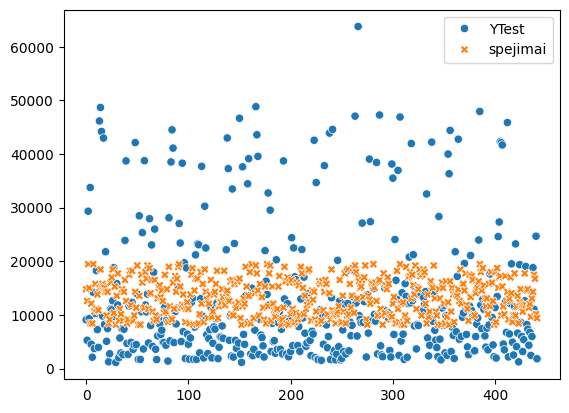

In [27]:
sns.scatterplot(data=res)

In [29]:
X = ins[['age', 'bmi', 'children']]
y= ins['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
fit = LinearRegression().fit(X_train, y_train)

In [31]:
pred = fit.predict(X_test)

In [32]:
spejimai = pd.Series(data = pred, name='spejimai')

In [34]:
res = pd.concat([y_test.reset_index(drop=True), spejimai], axis =1)

In [35]:
res.head()

,charges,spejimai
0,9095.06825,13579.609770
1,5272.17580,11744.155812
2,29330.98315,17097.387504
3,9301.89355,14656.906730
4,33750.29180,8492.898248


<Axes: >

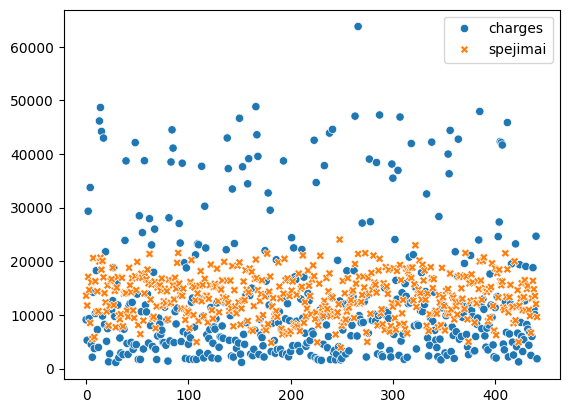

In [36]:
sns.scatterplot(data=res)

In [38]:
fit.score(X_test, y_test)*100.0

13.51277604693102

In [40]:
sex = pd.get_dummies(ins['sex'])
ins2=pd.concat([ins, sex], axis =1)
sm=pd.get_dummies(ins['smoker'])
ins3=pd.concat([ins2, sm], axis =1)

In [42]:
X= ins3.drop(columns=['sex', 'smoker', 'region', 'charges'])
y=ins3['charges']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)

In [44]:
fit.score(X_test, y_test)*100.0

75.87422388407032

In [45]:
spejimai = pd.Series(data = pred, name='spejimai')
res = pd.concat([y_test.reset_index(drop=True), spejimai], axis =1)

<Axes: >

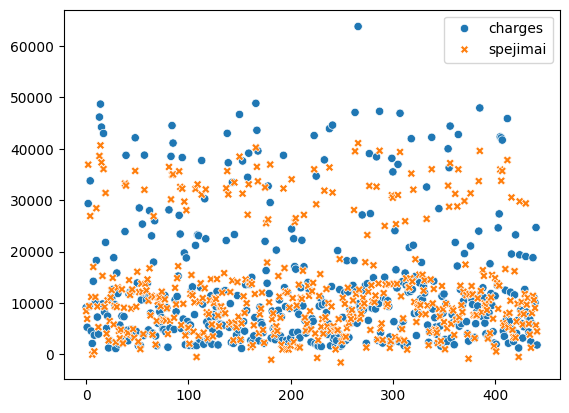

In [46]:
sns.scatterplot(data = res)

In [47]:
X

,age,bmi,children,female,male,no,yes
0,19,27.900,0,True,False,False,True
1,18,33.770,1,False,True,True,False
2,28,33.000,3,False,True,True,False
3,33,22.705,0,False,True,True,False
4,32,28.880,0,False,True,True,False
...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False
1334,18,31.920,0,True,False,True,False
1335,18,36.850,0,True,False,True,False
1336,21,25.800,0,True,False,True,False


In [53]:
fit.predict(np.reshape([32, 22, 1,True, False, True, False], (1, -1)))

array([3564.73848017])

In [ ]:
# Naudojamas seaborn pateikiamas duomenų rinkinys. Užduotis:
# Sukurti tiesinės regresijos modelį, kuris prognozuotų automobilio
# degalų suvartojimą (mpg - miles per gallon).


In [61]:
mpg = sns.load_dataset('mpg')
mpg = mpg.dropna()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [67]:
X= mpg.drop(columns=['mpg', 'origin', 'name'])
y=mpg['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0

In [75]:
fit.predict(np.reshape([8, 304, 150,3433, 12, 70], (1, -1)))

array([15.53437678])

<Axes: >

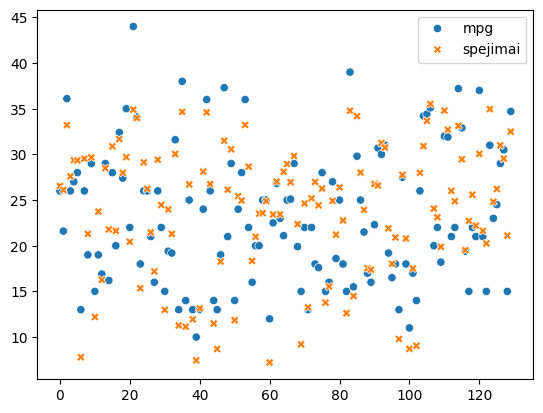

In [72]:
spejimai = pd.Series(data = pred, name='spejimai')
res = pd.concat([y_test.reset_index(drop=True), spejimai], axis =1)
sns.scatterplot(data = res)

In [76]:
zuveliokas = pd.read_csv('Fish.csv')
zuveliokas.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [78]:
rusis = pd.get_dummies(zuveliokas['Species'], dtype=int)
zuveliokas=pd.concat([zuveliokas, rusis], axis =1)

In [79]:
zuveliokas.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [80]:
X= zuveliokas.drop(columns=['Weight', 'Species'])
y=zuveliokas['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0

94.05192628555376

In [82]:
fit.predict(np.reshape([23, 25, 30,11.5, 4, 1, 0, 0, 0, 0, 0, 0], (1, -1)))

array([275.65824552])